# Install Required Packaged First

In [1]:
!pip install folium

# Introduction
***
Di file ini akan berisi penjelasan tentang membuat peta untuk berbagai keperluan. Untuk melakukannya kita perlu pustaka Python yang lain yaitu **Folium**. Pustaka ini digunakan untuk visualisasi data geospasial. Folium juga membantu kita untuk membuat peta Leaflet

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import folium

# Import dataset
***
1. San fransisco police department incident for the year 2016
2. Immigration to  Canada from 1980 to 2013

# Example Defining Folium Map
***
> Kita bisa menentukan definisi default peta dunia dengan menentukan pusat peta dan tingkat zoom awal.
> Semua lokasi di peta ditentukan oleh nilai Lintang dan Bujurnya masing-masing. Jadi kalian dapat membuat peta dan melewati di tengah nilai Lintang dan Bujur [0,0]
> **Semakin tinggi tingkat zoom, semakin besar zoom peta ke tengah**

In [3]:
# define the world map
world_map = folium.Map()
world_map

## Define world map centered around Bali with a low zoom level

In [4]:
bali_latitude_longitude =[-8.650000,115.216667]
world_map_bali = folium.Map(location=bali_latitude_longitude, zoom_start=9)
world_map_bali

# Explore Folium Map

## Stamen Toner Maps Style

In [5]:
world_map_bali = folium.Map(
    location=bali_latitude_longitude,
    zoom_start=15,
    tiles='Stamen Toner'
)
world_map_bali

## Stamen Terrain Maps

In [6]:
world_map_bali = folium.Map(
    location=bali_latitude_longitude,
    zoom_start=15,
    tiles='Stamen Terrain'
)
world_map_bali

# Maps with Markers

## Load dataset (Police Department)

In [7]:
df_police = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [8]:
df_police.shape

(150500, 13)

In [9]:
df_police.head(20)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
5,160002869,ASSAULT,BATTERY,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)",16000286904134
6,160003130,OTHER OFFENSES,PAROLE VIOLATION,Saturday,01/02/2016 12:00:00 AM,00:04,SOUTHERN,"ARREST, BOOKED",MARY ST / HOWARD ST,-122.405721,37.780879,"(37.7808789360214, -122.405721454567)",16000313026150
7,160003259,NON-CRIMINAL,FIRE REPORT,Saturday,01/02/2016 12:00:00 AM,01:02,TENDERLOIN,NONE,200 Block of EDDY ST,-122.411778,37.783981,"(37.7839805592634, -122.411778295992)",16000325968000
8,160003970,WARRANTS,WARRANT ARREST,Saturday,01/02/2016 12:00:00 AM,12:21,SOUTHERN,"ARREST, BOOKED",4TH ST / BERRY ST,-122.393357,37.775788,"(37.7757876218293, -122.393357241451)",16000397063010
9,160003641,MISSING PERSON,FOUND PERSON,Friday,01/01/2016 12:00:00 AM,10:06,BAYVIEW,NONE,100 Block of CAMERON WY,-122.387182,37.720967,"(37.7209669615499, -122.387181635995)",16000364175000


## Dataset Description
***
1. IncidntNum: Incident Number
2. Category: Category of crime or incident
3. Descript: Description of the crime or incident
4. DayOfWeek: The day of week on which the incident occurred
5. Date: The Date on which the incident occurred
6. Time: The time of day on which the incident occurred
7. PdDistrict: The police department district
8. Resolution: The resolution of the crime in terms whether the perpetrator was arrested or not
9. Address: The closest address to where the incident took place
10. X: The longitude value of the crime location
11. Y: The latitude value of the crime location
12. Location: A tuple of the latitude and the longitude values
13. PdId: The police department ID

In [10]:
# ambil sample 100 dataset pertama
limits = 100
df_police_limits = df_police.iloc[0:limits,:]
df_police_limits.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


## San Fransisco world Map
***
Visualisasikan kejahatan yang terjadi di kota San Fransisco, dengan zoom level 12

In [11]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

san_fran_world_map = folium.Map(
    location=[latitude,longitude],
    zoom_start=12
)
san_fran_world_map

### Letakkan lokasi kejahatan pada peta San Fransisco
***
Tahun lokasi kejahatan pada dataset ke dalam peta sanfransisco. <br>
Caranya adalah dengan membuat feature group dengan fitur dan gayanya sendiri, lalu menambahkannya ke san fransico map

In [12]:
# Instansiasi kelas FeatureGroup untuk menampung incidents yang ada
incidents = folium.map.FeatureGroup()

# Looping sejumlah 100 kejahatan, lalu tambahkan ke incident
for lat, long in zip(df_police_limits.Y,df_police_limits.X):
    incidents.add_child(
        #tambahkan berupa circle marker
        folium.CircleMarker(
            location=[lat,long],
            radius=5, #seberapa besar lingkarannya
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )

# Tambahkan incident ke san_frans map
san_fran_world_map.add_child(incidents)

### Menambahkan teks pop up ke dalam map incident

In [13]:
# Instansiasi kelas FeatureGroup untuk menampung incidents yang ada
incidents = folium.map.FeatureGroup()

# Looping sejumlah 100 kejahatan, lalu tambahkan ke incident
for lat, long in zip(df_police_limits.Y,df_police_limits.X):
    incidents.add_child(
        #tambahkan berupa circle marker
        folium.CircleMarker(
            location=[lat,long],
            radius=5, #seberapa besar lingkarannya
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )

# add pop up text for specific lat, long
lattitudes = list(df_police_limits.Y)
longitudes = list(df_police_limits.X)
popup_text = list(df_police_limits.Category)

for lat,long,label in zip(lattitudes,longitudes,popup_text):
    folium.Marker(
        location=[lat,long],
        popup=label
    ).add_to(san_fran_world_map)

# Tambahkan incident ke san_frans map
san_fran_world_map.add_child(incidents)

### Menghapus marker agar peta tidak terlihat terlalu padat, dan menambahkan popup text hanya untuk circle marker

In [14]:
san_fran_world_map = folium.Map(location=[latitude, longitude], zoom_start=12)

incidents = folium.map.FeatureGroup()

# add pop up text for specific lat, long
lattitudes = list(df_police_limits.Y)
longitudes = list(df_police_limits.X)
popup_text = list(df_police_limits.Category)

for lat, long, label in zip(lattitudes, longitudes, popup_text):
    incidents.add_child(
        folium.CircleMarker(
            location=[lat, long],
            radius=5,  # seberapa besar lingkarannya
            color='yellow',
            fill=True,
            popup=label,
            fill_color='red',
            fill_opacity=0.6
        )
    )

san_fran_world_map.add_child(incidents)

### Menambahkan marker cluster
***
Solusi lain agar peta tidak terlalu terlihat padat adalah dengan menambahkan cluster marker ke dalamnya. Pustaka yang diperlukan adalah **plugins** dari **folium**

In [15]:
from folium import plugins

In [16]:
san_fran_world_map = folium.Map(location=[latitude,longitude],zoom_start=12)

# instantiasi marker cluster untuk insiden di dataframe
incidents = plugins.MarkerCluster().add_to(san_fran_world_map)

for lat,long,label in zip(lattitudes,longitudes,popup_text):
    folium.CircleMarker(
        location=[lat,long],
        popup=label,
        icon=None
    ).add_to(incidents)

In [17]:
san_fran_world_map

# Choropleth Maps

## Description
***
Choropleth Maps adalah peta tematik dimana daerah arsiran atau berpola di dalamnya sebanding dengan pengukuran variabel statistik yang ditampilkan di peta seperti kepadatan penduduk, pendapatan perkapita. Contoh peta Choropleth di bawah adalah menampilkan peta AS yang menggambarkan populasi dengan mil persegi per negara bagian.
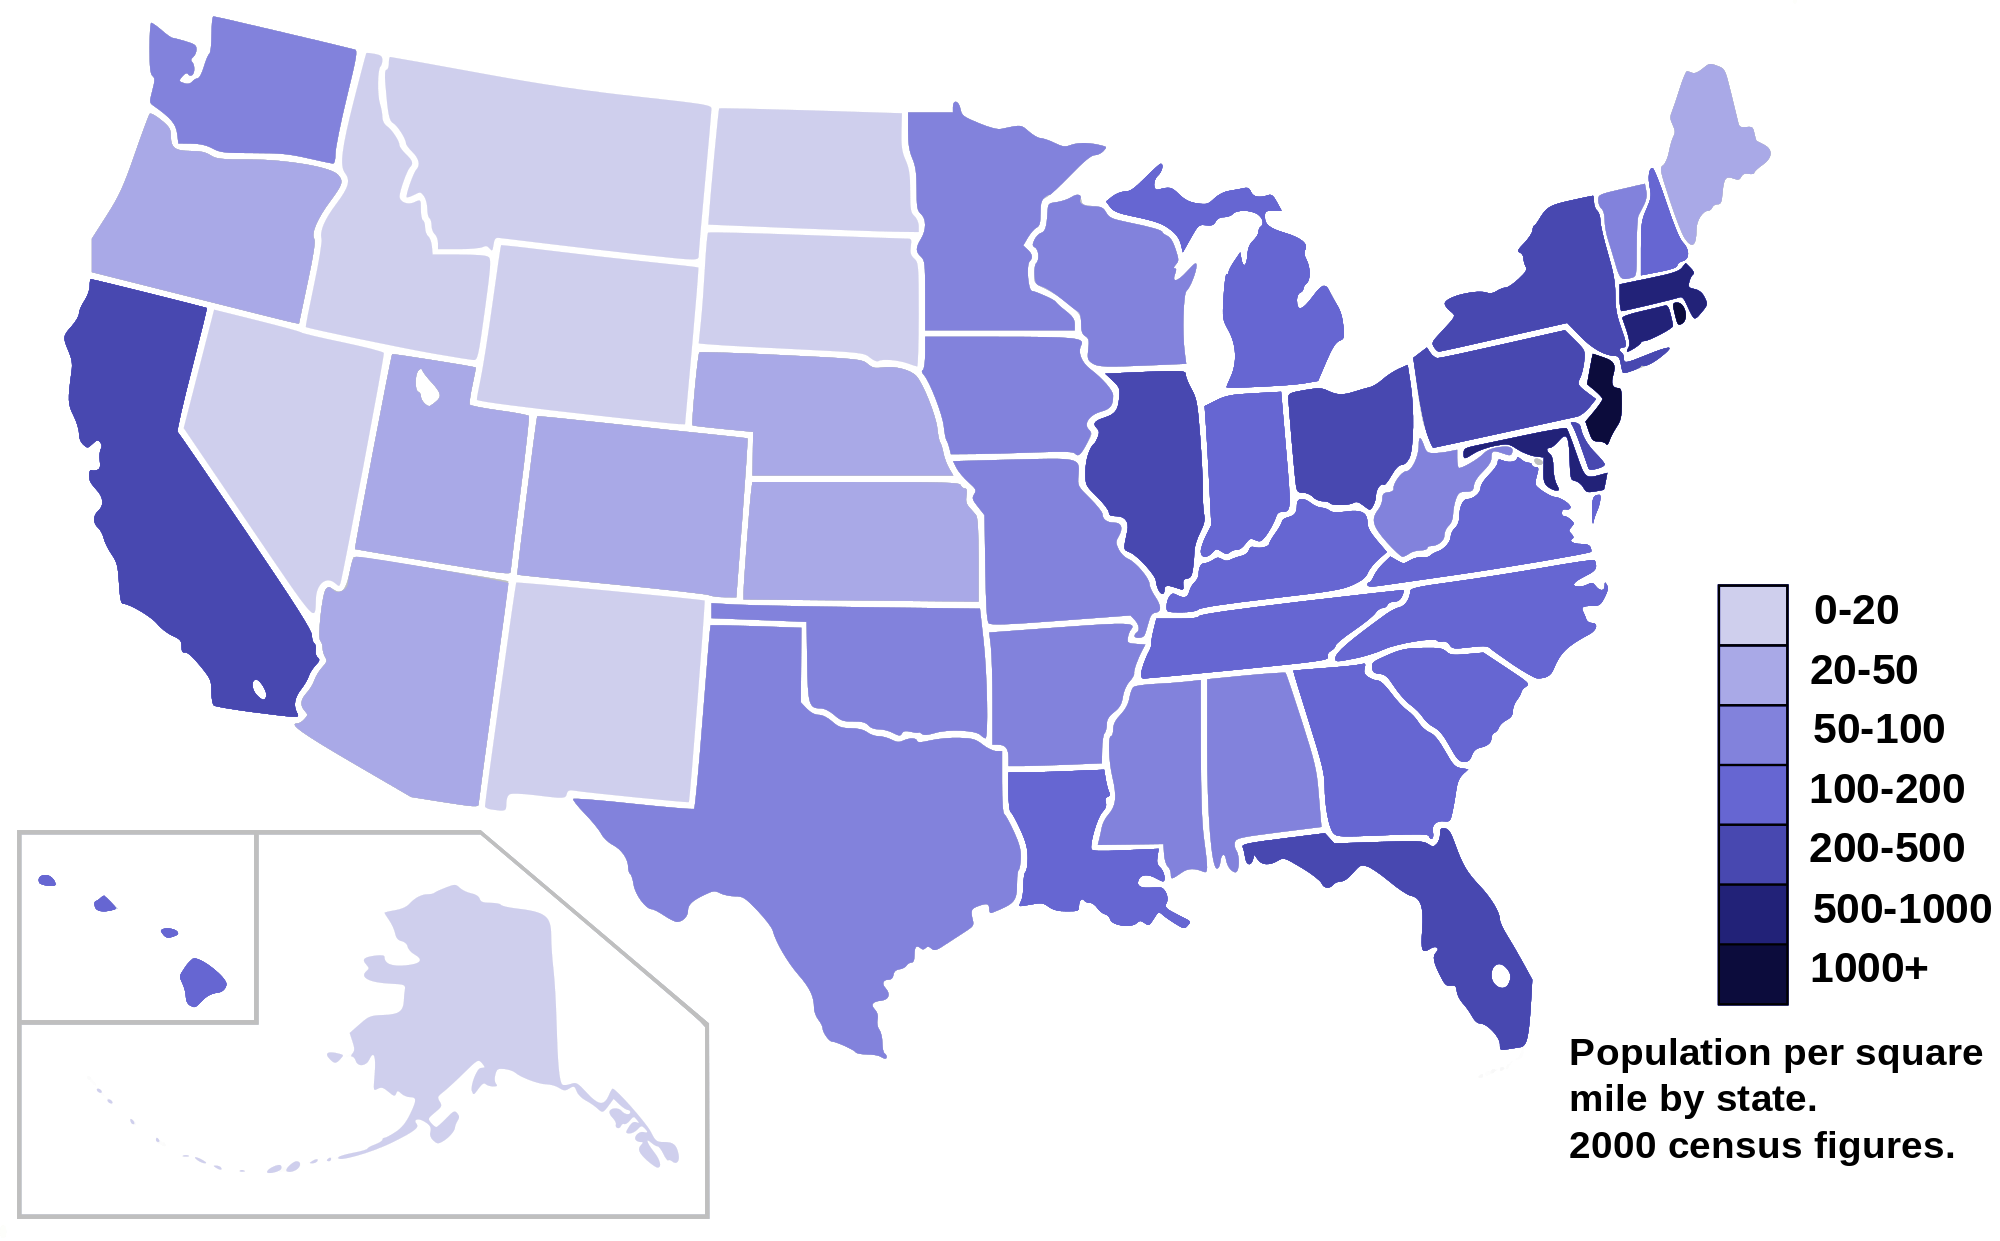

## Case Study
***
Gambarkan peta Choropleth yang menggambarkan imigrasi dari berbagai negara ke Canada

### Load Canada by Citizenship

In [18]:
df_canada = pd.read_excel(
    'data/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2
)

In [19]:
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


### Preprocessing Data
***
1. remove unwanted columns
2. reset index by country
3. rename columns name
4. map all integer columns to string
5. make new column "Total" as total number for all imigran for each country axis =1

In [20]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_canada.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_canada.columns = list(map(str, df_canada.columns))

# adding new columns Total
df_canada['Total'] = df_canada[[str(col) for col in range(1980,2014)]].sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))


### include GeoJSON
***
Pustaka ini dibutuhkan untuk mendefinisikan area atau batas negara bagian, kabupaten, atau negara yang kita minati.

#### Download GeoJSON

In [21]:
# download countries geojson file
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json

### Contoh Kasus
***
Kita akan membuat sebuah peta yang berpusat di [0,0] dengan zoom_start = 2 memnggunakan style Mapbox Bright

In [22]:
# geojson file
world_geo = r'world_countries.json'

# create a plain world map
world_map_geo = folium.Map(location=[0,0],zoom_start=2, tiles='Stamen Terrain')

# Generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
folium.Choropleth (
    geo_data=world_geo,
    data=df_canada,
    columns=['Country','Total'],
    key_on='feature.properties.name',
    legend_name='Immigration to Canada',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
).add_to(world_map_geo)
world_map_geo